In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16220075079907301770
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10556121627735169035
physical_device_desc: "device: XLA_GPU device"
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6129303701531061600
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10927236711
locality {
  bus_id: 1
  links {
    link {
      device_id: 1
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 2
      type: "StreamExecutor"
      strength: 1
    }
    link {
      device_id: 3
      type: "StreamExecutor"
      strength: 1
    }
  }
}
incarnation: 15153929332077609622
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:GPU:1"
device_type: "GPU"


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [3]:
cd /media/datastorage/Phong/cifar100_png/

/media/datastorage/Phong/cifar100_png


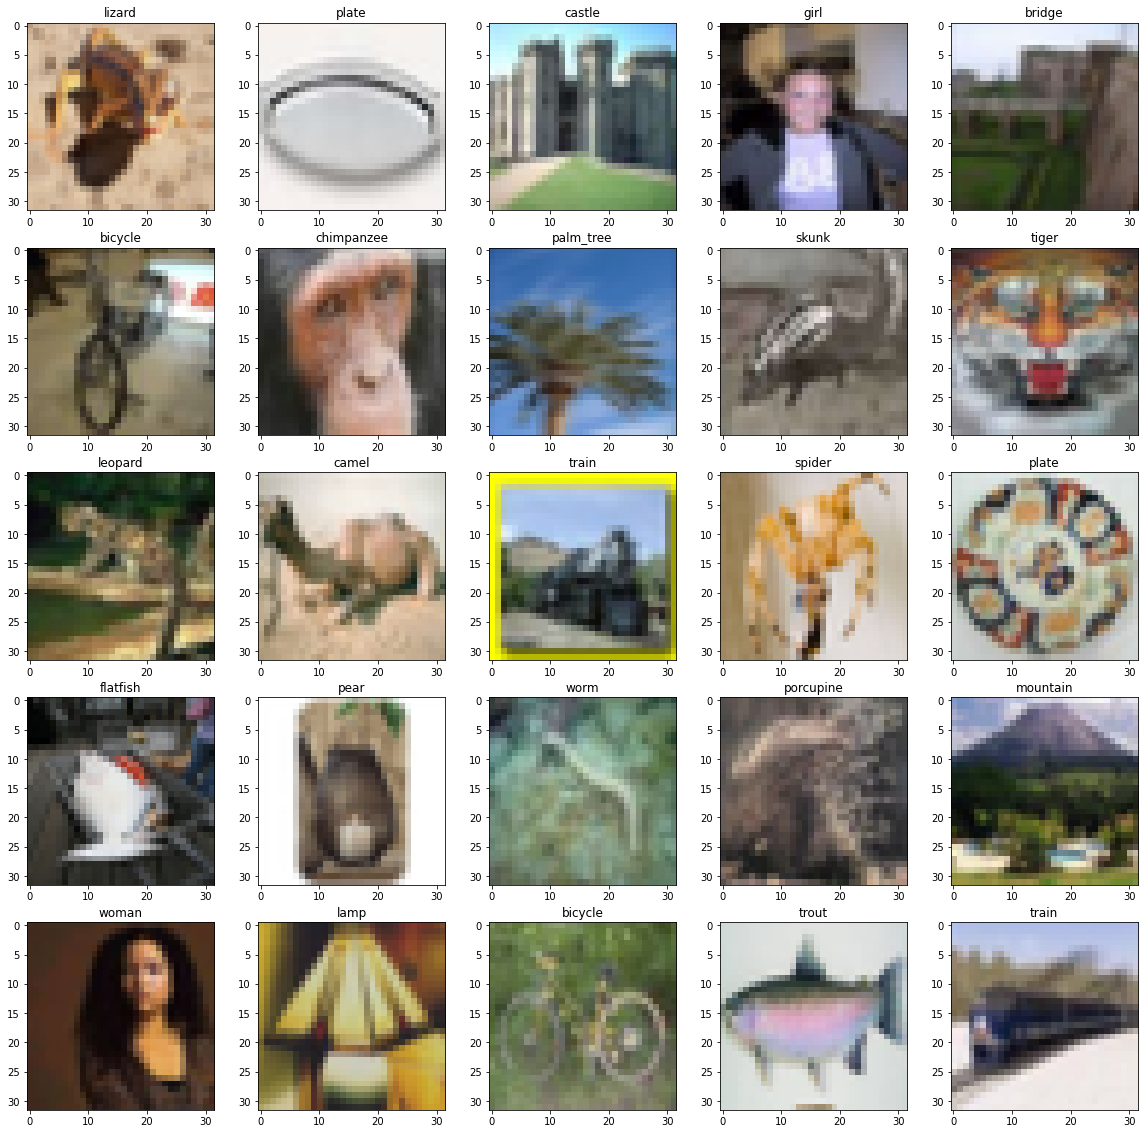

In [6]:
#Images/n02105855-Shetland_sheepdog/n02105855_9415.jpg

import glob
import os

import numpy as np
from matplotlib.image import imread
%matplotlib inline
import matplotlib.pyplot as plt

# get image parts
def get_image_parts(image_path):
    """Given a full path to an image, return its parts."""
    parts = image_path.split(os.path.sep)
    #print(parts)
    filename = parts[2]
    filename_no_ext = filename.split('.')[0]
    classname = parts[1]
    train_or_test = parts[0]
    
    return train_or_test, classname, filename_no_ext, filename
    
    
sample_images = list(glob.glob(os.path.join('train/', '*/*'), recursive=True))
np.random.seed(42)
rand_imgs = np.random.choice(sample_images, size=5*5)
fig, axarr = plt.subplots(5, 5, figsize=(20, 20))

for i, rand_img in enumerate(rand_imgs):
    train_or_test, classname, filename_no_ext, filename = get_image_parts(rand_img)
    
    j = i // 5
    k = i % 5
    axarr[j][k].imshow(imread(rand_img))
    axarr[j][k].title.set_text(classname)
    axarr[j][k].grid(False)

In [ ]:
# from PIL import Image
# import numpy

# def convert_img_square(im_pth='', dest_path='', desired_size=224):
# #     print(im_pth)
    
#     im = Image.open(im_pth)
#     old_size = im.size  # (width, height) format

#     ratio = float(desired_size)/max(old_size)
#     new_size = tuple([int(x*ratio) for x in old_size])

# #     new_im = im.resize(new_size, Image.ANTIALIAS)
#     new_im = im.resize(new_size)
    
#     new_im = new_im.convert('RGB')
    
#     new_im.save(dest_path)

#     return True

In [ ]:
# ####=======================
# import glob
# import os
# import shutil
# import random

# #move class folder from classname_# to classname/#

# def get_image_parts(image_path):
#     """Given a full path to an image, return its parts."""
#     parts = image_path.split(os.path.sep)
#     #print(parts)
#     filename = parts[2]
#     filename_no_ext = filename.split('.')[0]
#     classname = parts[1]
#     train_or_test = parts[0]
    
#     return train_or_test, classname, filename_no_ext, filename

# move_folders = ['fashion_mnist_train_resized_299']
# dest_folder = 'fashion_mnist_train_resized_350'
# data_file = []

# # look for all images in sub-folders
# for folder in move_folders:
#     class_folders = glob.glob(os.path.join(folder, '*'))
#     print('folder %s' %class_folders)
    
# #     for sub_folder in class_folders:
# #         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
# #         print('sub folder %s' %sub_class_folders)
        
#     for iid_class in class_folders:
#         print(iid_class)
        
#         class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
# #         #Determize Set# (No Suffle)
#         set = len(class_files)
#         inner = range(0*set, 1*set) #all

#         print('moving %d files' %(len(inner)))

# #         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
# #         for idx in range(len(random_list)):

#         for idx in range(len(inner)):
#             src = class_files[inner[idx]]

#             train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
#             dst = os.path.join(dest_folder, classname, filename)

#             # image directory
#             img_directory = os.path.join(dest_folder, classname)

#             # create folder if not existed
#             if not os.path.exists(img_directory):
#                 os.makedirs(img_directory)
                
#             # convert image
#             convert_img_square(src, dst, 350)
# #             #moving file
# #             shutil.move(src, dst)
# # #                 shutil.copy(src, dst)


In [ ]:
# ####=======================
# import glob
# import os
# import shutil
# import random

# #move class folder from classname_# to classname/#

# def get_image_parts(image_path):
#     """Given a full path to an image, return its parts."""
#     parts = image_path.split(os.path.sep)
#     #print(parts)
#     filename = parts[2]
#     filename_no_ext = filename.split('.')[0]
#     classname = parts[1]
#     train_or_test = parts[0]
    
#     return train_or_test, classname, filename_no_ext, filename

# move_folders = ['fashion_mnist_test_resized_299']
# dest_folder = 'fashion_mnist_test_resized_350'
# data_file = []

# # look for all images in sub-folders
# for folder in move_folders:
#     class_folders = glob.glob(os.path.join(folder, '*'))
#     print('folder %s' %class_folders)
    
# #     for sub_folder in class_folders:
# #         sub_class_folders = glob.glob(os.path.join(sub_folder, '*'))    
# #         print('sub folder %s' %sub_class_folders)
        
#     for iid_class in class_folders:
#         print(iid_class)
        
#         class_files = glob.glob(os.path.join(iid_class, '*.png'))
        
# #         #Determize Set# (No Suffle)
#         set = len(class_files)
#         inner = range(0*set, 1*set) #all

#         print('moving %d files' %(len(inner)))

# #         random_list = random.sample(range(len(class_files)), int(len(class_files)/5)) #1/5 dataset
# #         for idx in range(len(random_list)):

#         for idx in range(len(inner)):
#             src = class_files[inner[idx]]

#             train_or_test, classname, filename_no_ext, filename = get_image_parts(src)
#             dst = os.path.join(dest_folder, classname, filename)

#             # image directory
#             img_directory = os.path.join(dest_folder, classname)

#             # create folder if not existed
#             if not os.path.exists(img_directory):
#                 os.makedirs(img_directory)
                
#             # convert image
#             convert_img_square(src, dst, 299)
# #             #moving file
# #             shutil.move(src, dst)
# # #                 shutil.copy(src, dst)


In [4]:
## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

def multi_gpu_model(model, gpus):
    if isinstance(gpus, (list, tuple)):
        num_gpus = len(gpus)
        target_gpu_ids = gpus
    else:
        num_gpus = gpus
        target_gpu_ids = range(num_gpus)

    def get_slice(data, i, parts):
        shape = tf.shape(data)
        batch_size = shape[:1]
        input_shape = shape[1:]
        step = batch_size // parts
        if i == num_gpus - 1:
            size = batch_size - step * i
        else:
            size = step
        size = tf.concat([size, input_shape], axis=0)
        stride = tf.concat([step, input_shape * 0], axis=0)
        start = stride * i
        return tf.slice(data, start, size)

    all_outputs = []
    for i in range(len(model.outputs)):
        all_outputs.append([])

    # Place a copy of the model on each GPU,
    # each getting a slice of the inputs.
    for i, gpu_id in enumerate(target_gpu_ids):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('replica_%d' % gpu_id):
                inputs = []
                # Retrieve a slice of the input.
                for x in model.inputs:
                    input_shape = tuple(x.get_shape().as_list())[1:]
                    slice_i = Lambda(get_slice,
                                   output_shape=input_shape,
                                   arguments={'i': i,
                                              'parts': num_gpus})(x)
                    inputs.append(slice_i)

                # Apply model on slice
                # (creating a model replica on the target device).
                outputs = model(inputs)
                if not isinstance(outputs, list):
                    outputs = [outputs]

                # Save the outputs for merging back together later.
                for o in range(len(outputs)):
                    all_outputs[o].append(outputs[o])

    # Merge outputs on CPU.
    with tf.device('/cpu:0'):
        merged = []
        for name, outputs in zip(model.output_names, all_outputs):
            merged.append(concatenate(outputs,
                                    axis=0, name=name))
        return Model(model.inputs, merged)


Using TensorFlow backend.


In [5]:
from keras.callbacks import Callback
import pickle
import sys

#Stop training on val_acc
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

#Save large model using pickle formate instead of h5            
class SaveCheckPoint(Callback):
    def __init__(self, model, dest_folder):
        super(Callback, self).__init__()
        self.model = model
        self.dest_folder = dest_folder
        
        #initiate
        self.best_val_acc = 0
        self.best_val_loss = sys.maxsize #get max value
          
    def on_epoch_end(self, epoch, logs={}):
        val_acc = logs['val_acc']
        val_loss = logs['val_loss']

        if val_acc > self.best_val_acc:
            self.best_val_acc = val_acc
            
            # Save weights in pickle format instead of h5
            print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
            weigh= self.model.get_weights()

            #now, use pickle to save your model weights, instead of .h5
            #for heavy model architectures, .h5 file is unsupported.
            fpkl= open(self.dest_folder, 'wb') #Python 3
            pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
            fpkl.close()
            
#             model.save('tmp.h5')
        elif val_acc == self.best_val_acc:
            if val_loss < self.best_val_loss:
                self.best_val_loss=val_loss
                
                # Save weights in pickle format instead of h5
                print('\nSaving val_acc %f at %s' %(self.best_val_acc, self.dest_folder))
                weigh= self.model.get_weights()

                #now, use pickle to save your model weights, instead of .h5
                #for heavy model architectures, .h5 file is unsupported.
                fpkl= open(self.dest_folder, 'wb') #Python 3
                pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
                fpkl.close()                    

In [ ]:
# !pip3 install git+https://github.com/qubvel/classification_models.git

In [6]:
#SET 1

from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, SimpleRNN, Reshape, Concatenate,Bidirectional
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

senet, preprocess_input = Classifiers.get('seresnext101')

f2_base = senet(input_shape=(299,299,3), weights='imagenet', include_top=False)
f2_x = GlobalAveragePooling2D()(f2_base.output)

#ADV Model
# f2_x = Reshape([1,2048])(f2_x)  
# f2_x = SimpleRNN(2048, 
#             return_sequences=False,                       
# #             dropout=0.8                                     
#             input_shape=[1,2048])(f2_x)

#Regularization with noise
f2_x = GaussianNoise(0.1)(f2_x)

f2_x = Dense(1024, activation='relu')(f2_x)
f2_x = Dense(100, activation='softmax')(f2_x)
model_2 = Model(inputs=[f2_base.input],outputs=[f2_x])

print(model_2.summary())
# # print(f2_base.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 305, 305, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 150, 150, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 150, 150, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
lambda_413 (Lambda)             (None, 21, 21, 16)   0           zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
lambda_414 (Lambda)             (None, 21, 21, 16)   0           zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
lambda_415 (Lambda)             (None, 21, 21, 16)   0           zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
lambda_416 (Lambda)             (None, 21, 21, 16)   0           zero_padding2d_15[0][0]          
__________________________________________________________________________________________________
lambda_417 (Lambda)             (None, 21, 21, 16)   0           zero_padding2d_15[0][0]          
__________

conv2d_873 (Conv2D)             (None, 19, 19, 16)   2304        lambda_796[0][0]                 
__________________________________________________________________________________________________
conv2d_874 (Conv2D)             (None, 19, 19, 16)   2304        lambda_797[0][0]                 
__________________________________________________________________________________________________
conv2d_875 (Conv2D)             (None, 19, 19, 16)   2304        lambda_798[0][0]                 
__________________________________________________________________________________________________
conv2d_876 (Conv2D)             (None, 19, 19, 16)   2304        lambda_799[0][0]                 
__________________________________________________________________________________________________
conv2d_877 (Conv2D)             (None, 19, 19, 16)   2304        lambda_800[0][0]                 
__________________________________________________________________________________________________
conv2d_878

In [ ]:
# %mv train_resized train_resized_299
# %mv test_resized test_resized_299

In [ ]:
mkdir checkpoints

In [10]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

NUM_GPU = 4
batch_size = 40
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_2, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar100_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar100_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

# number of steps each epoch
step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
1250/1250 [==============================] - 1384s 1s/step - loss: 1.9064 - acc: 0.4961 - val_loss: 0.9757 - val_acc: 0.7226

Saving val_acc 0.722600 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD.pkl
Epoch 2/40
1250/1250 [==============================] - 1126s 901ms/step - loss: 1.1421 - acc: 0.6688 - val_loss: 0.8434 - val_acc: 0.7532

Saving val_acc 0.753200 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD.pkl
Epoch 3/40
1250/1250 [==============================] - 1127s 902ms/step - loss: 0.9238 - acc: 0.7276 - val_loss: 0.7532 - val_acc: 0.7850

Saving val_acc 0.785000 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD.pkl
Epoch 4/40
1250/1250 [==============================] - 1131s 905ms/step - loss: 0.7925 - acc: 0.7623 - val_loss: 0.7343 - val_acc: 0.7907

Saving val_acc 0.790700 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD.pkl
Epoch 5/40
1250/1250 [===========

In [11]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

# #use set_weights to load the modelweights into the model architecture
# NUM_GPU = 4
# #Using multiple models if more than 1 GPU
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [ ]:
mkdir checkpoints

In [12]:
# Change LR=1e-5

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

savedfilename = os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl')
savecheckpoint = SaveCheckPoint(model_2, savedfilename)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
1250/1250 [==============================] - 1448s 1s/step - loss: 0.1439 - acc: 0.9551 - val_loss: 0.7060 - val_acc: 0.8413

Saving val_acc 0.841300 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl
Epoch 2/15
1250/1250 [==============================] - 1166s 933ms/step - loss: 0.1105 - acc: 0.9651 - val_loss: 0.7168 - val_acc: 0.8432

Saving val_acc 0.843200 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl
Epoch 3/15
1250/1250 [==============================] - 1164s 931ms/step - loss: 0.0955 - acc: 0.9706 - val_loss: 0.7285 - val_acc: 0.8442

Saving val_acc 0.844200 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl
Epoch 4/15
1250/1250 [==============================] - 1164s 931ms/step - loss: 0.0892 - acc: 0.9724 - val_loss: 0.7206 - val_acc: 0.8453

Saving val_acc 0.845300 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl
Epoch 5/15
1250/1250 [==============================] - 1162s 930ms/step - loss: 0.0813 - acc: 0.9757 - val_los

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1250/1250 [==============================] - 1164s 931ms/step - loss: 0.0620 - acc: 0.9809 - val_loss: 0.7573 - val_acc: 0.8479
Epoch 12/15
1250/1250 [==============================] - 1163s 931ms/step - loss: 0.0585 - acc: 0.9821 - val_loss: 0.7578 - val_acc: 0.8511

Saving val_acc 0.851100 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl
Epoch 13/15
1148/1250 [==========================>...] - ETA: 1:28 - loss: 0.0597 - acc: 0.9818

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1250/1250 [==============================] - 1164s 931ms/step - loss: 0.0545 - acc: 0.9833 - val_loss: 0.7674 - val_acc: 0.8496


In [ ]:
max(result.history['val_acc']),min(result.history['val_acc'])

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# list all data in history
# history = result.history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('SeNet - 501 - Noise model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('SeNet - 501 - Noise model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD_L2.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

# #use set_weights to load the modelweights into the model architecture
# NUM_GPU = 4
# #Using multiple models if more than 1 GPU
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [14]:
# Change LR=1e-6

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

savedfilename = os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD_L3.pkl')
savecheckpoint = SaveCheckPoint(model_2, savedfilename)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
1250/1250 [==============================] - 1446s 1s/step - loss: 0.0532 - acc: 0.9834 - val_loss: 0.7551 - val_acc: 0.8519

Saving val_acc 0.851900 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L3.pkl
Epoch 2/15
1250/1250 [==============================] - 1129s 903ms/step - loss: 0.0526 - acc: 0.9842 - val_loss: 0.7531 - val_acc: 0.8521

Saving val_acc 0.852100 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L3.pkl
Epoch 3/15
1250/1250 [==============================] - 1131s 905ms/step - loss: 0.0506 - acc: 0.9851 - val_loss: 0.7486 - val_acc: 0.8541

Saving val_acc 0.854100 at checkpoints/Cifar100_SEResNext101_LRG299_Mul_STD_L3.pkl
Epoch 4/15
1250/1250 [==============================] - 1131s 905ms/step - loss: 0.0507 - acc: 0.9848 - val_loss: 0.7521 - val_acc: 0.8526
Epoch 5/15
1250/1250 [==============================] - 1132s 906ms/step - loss: 0.0507 - acc: 0.9853 - val_loss: 0.7475 - val_acc: 0.8532
Epoch 6/15
1250/1250 [==============================] - 

In [15]:
max(result.history['val_acc']),min(result.history['val_acc'])

(0.8541000003814697, 0.8518999997377396)

In [ ]:
# import tensorflow as tf
# import keras.backend as K

# run_meta = tf.RunMetadata()
# with tf.Session(graph=tf.Graph()) as sess:
#     K.set_session(sess)
#     net = senet(input_tensor=tf.placeholder('float32', shape=(1,421,421,3)))

#     opts = tf.profiler.ProfileOptionBuilder.float_operation()    
#     flops = tf.profiler.profile(sess.graph, run_meta=run_meta, cmd='op', options=opts)

#     opts = tf.profiler.ProfileOptionBuilder.trainable_variables_parameter()    
#     params = tf.profiler.profile(sess.graph, run_meta=run_meta, cmd='op', options=opts)

#     print("{:,} --- {:,}".format(flops.total_float_ops, params.total_parameters))

In [8]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD_L3.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

# #use set_weights to load the modelweights into the model architecture
# NUM_GPU = 4
# #Using multiple models if more than 1 GPU
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [9]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import time, os
from math import ceil

# PREDICT ON OFFICIAL TEST
train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

batch_size = 40

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cifar100_SeResNet101_MulModels299_STD_2208_v1.csv')
results.head()

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
250/250 [==============================] - 118s 471ms/step


,file_name,predicted1
0,apple/0001.png,apple
1,apple/0002.png,apple
2,apple/0003.png,apple
3,apple/0004.png,pear
4,apple/0005.png,apple


In [18]:
results.tail()

,file_name,predicted1
9995,worm/0096.png,worm
9996,worm/0097.png,worm
9997,worm/0098.png,worm
9998,worm/0099.png,snake
9999,worm/0100.png,worm


In [ ]:
cp Cifar10_SeResNet101_MulModels299_STD_1511_v8.csv /home/bribeiro/Phong/Nat19/Cifar10_SeResNet101_MulModels299_STD_1511_v8.csv

In [20]:
mkdir pred_npy

In [10]:
np.save(os.path.join('pred_npy','Cifar100_SEResNext101_LRG299_Mul.npy'), predict1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

batch_size = 40

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator(batches, crop_length):
    """Generate random crops from the image batches"""
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_datagen_crop = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

testing_set_crop = test_datagen_crop.flow_from_directory('test_resized_299',
                                                 target_size = (320, 320),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="training"
                                              )
#customized generator
test_crops = crop_generator(testing_set_crop, 299)

step_size_test_crop = ceil(testing_set_crop.n/testing_set_crop.batch_size)

tta_steps = 11
predictions = []

# import tensorflow as tf
# with tf.device('/gpu:0'):
for i in range(tta_steps):
    print(i)
    testing_set_crop.reset()
    if NUM_GPU != 1:
        preds=model_mul.predict_generator(test_crops, 
                                           steps = step_size_test_crop,
#                                            max_queue_size=16,
#                                                use_multiprocessing=True,
#                                            workers=1,
                                           verbose=1)    
#     else:
#         preds=model.predict_generator(test_crops, 
#                                            steps = step_size_test_crop,
#                                            max_queue_size=16,
# #                                                use_multiprocessing=True,
#                                            workers=1,
#                                            verbose=1)  
#     preds=model_2.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
    predictions.append(preds)

mean_pred = np.mean(predictions, axis=0)

predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cifar10_SeResNet101_MulModels299_STD_tta_11_1511_v9.csv')
results.head(10)

In [ ]:
cp Cifar10_SeResNet101_MulModels299_STD_tta_11_1511_v9.csv /home/bribeiro/Phong/Nat19/Cifar10_SeResNet101_MulModels299_STD_tta_11_1511_v9.csv

In [ ]:
train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )


predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cifar10_SeResNet101_MulModels299_STD_tta_15_1511_v6.csv')
results.head(10)

In [ ]:
cp Cifar10_SeResNet101_MulModels299_STD_tta_15_1511_v6.csv /home/bribeiro/Phong/Nat19/Cifar10_SeResNet101_MulModels299_STD_tta_15_1511_v6.csv

In [ ]:
np.save(os.path.join('pred_npy','Cifar10_SeResNet101_MulModels299_STD_tta_15_1511_v6.npy'), mean_pred)

In [ ]:
# # Save weights in pickle format instead of h5
# import pickle

# #use get_weights() command to get your model weights
# weigh= model_2.get_weights()

# #now, use pickle to save your model weights, instead of .h5
# #for heavy model architectures, .h5 file is unsupported.
# pklfile= os.path.join('checkpoints', 'FashionMNIST_SEResNext101_LRG501_Mul_STD.pkl')

# fpkl= open(pklfile, 'wb') #Python 3
# pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
# fpkl.close()

In [ ]:
os.listdir("checkpoints")

In [ ]:
# #use pickle to load model weights
# import os
# import pickle

# pklfile= os.path.join('checkpoints', 'FashionMNIST_SEResNext101_LRG299_Mul_LSTM_L3.pkl')

# f= open(pklfile, 'rb')     #Python 3                 
# weigh= pickle.load(f);                
# f.close();

# #use set_weights to load the modelweights into the model architecture
# NUM_GPU = 4
# #Using multiple models if more than 1 GPU
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

# model_mul.set_weights(weigh)

In [ ]:
# model 2 - SeResNext101
#use pickle to load model weights
import os
import pickle

# load to multi gpu
NUM_GPU = 4
model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

#load model the saved weights
pklfile= os.path.join('checkpoints', 'Cifar10_SEResNext101_LRG299_Mul_STD_L3.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#set the saved weight to mul-gpus model
model_mul.set_weights(weigh)

f2_sgl = model_mul.layers[-2]

#get weight from single gpu
weigh= f2_sgl.get_weights()

#now, use pickle to save model weights, instead of .h5
#for heavy model architectures, .h5 file is unsupported.
pklfile= os.path.join('checkpoints', 'Cifar10_SEResNext101_LRG299_Mul_STD_L3_SGL.pkl')

fpkl= open(pklfile, 'wb') #Python 3
pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
fpkl.close()

In [ ]:
#model 2 - SEResNext101
#load model the saved weights
pklfile= os.path.join('checkpoints', 'Cifar10_SEResNext101_LRG299_Mul_STD_L3_SGL.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#set the saved weight to mul-gpus model
model_2.set_weights(weigh)

In [ ]:
# # load to multi gpu
# NUM_GPU = 4
# model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

# #get weight from mul gpu
# weigh= model_mul.get_weights()

# #now, use pickle to save model weights, instead of .h5
# #for heavy model architectures, .h5 file is unsupported.
# pklfile= os.path.join('checkpoints', 'FashionMNIST_SEResNext101_LRG299_Mul_LSTM_L3_SGL.pkl')

# fpkl= open(pklfile, 'wb') #Python 3
# pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
# fpkl.close()

In [8]:
#Set 1
#MUL 1 - Xception

# from keras.applications import InceptionV3
from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, Reshape, Bidirectional
# from keras.applications.inception_v3 import preprocess_input
from keras.applications.xception import preprocess_input

from keras.layers import GaussianNoise

f1_base = Xception(weights='imagenet', include_top=False, input_shape=(299,299,3))  
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

# f1_x = Reshape([1,2048])(f1_x)  
# f1_x = Bidirectional(LSTM(1024, 
#                                  return_sequences=False, 
# #                                  dropout=0.8
#                                 ),
#                             input_shape=[1,2048],
#                             merge_mode='concat')(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(2048, activation='relu')(f1_x)
f1_x = Dense(100, activation='softmax')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [9]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 100

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
500/500 [==============================] - 917s 2s/step - loss: 2.1630 - acc: 0.4520 - val_loss: 0.9266 - val_acc: 0.7200

Epoch 00001: val_acc improved from -inf to 0.72000, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD.hdf5
Epoch 2/40
500/500 [==============================] - 889s 2s/step - loss: 1.1763 - acc: 0.6586 - val_loss: 0.7662 - val_acc: 0.7703

Epoch 00002: val_acc improved from 0.72000 to 0.77030, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD.hdf5
Epoch 3/40
500/500 [==============================] - 888s 2s/step - loss: 0.9759 - acc: 0.7141 - val_loss: 0.6998 - val_acc: 0.7913

Epoch 00003: val_acc improved from 0.77030 to 0.79130, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD.hdf5
Epoch 4/40
500/500 [==============================] - 888s 2s/step - loss: 0.8473 - acc: 0.7490 - val_loss: 0.6578 - val_acc: 0.8012

Epoch 00004: v

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 891s 2s/step - loss: 0.3100 - acc: 0.9015 - val_loss: 0.7174 - val_acc: 0.8255

Epoch 00016: val_acc did not improve from 0.82800
Epoch 17/40
500/500 [==============================] - 891s 2s/step - loss: 0.2959 - acc: 0.9076 - val_loss: 0.7368 - val_acc: 0.8226

Epoch 00017: val_acc did not improve from 0.82800
Epoch 18/40
500/500 [==============================] - 891s 2s/step - loss: 0.2705 - acc: 0.9143 - val_loss: 0.7602 - val_acc: 0.8239

Epoch 00018: val_acc did not improve from 0.82800
Epoch 19/40
500/500 [==============================] - 890s 2s/step - loss: 0.2660 - acc: 0.9155 - val_loss: 0.7511 - val_acc: 0.8236

Epoch 00019: val_acc did not improve from 0.82800
Epoch 20/40
500/500 [==============================] - 892s 2s/step - loss: 0.2529 - acc: 0.9199 - val_loss: 0.7571 - val_acc: 0.8197

Epoch 00020: val_acc did not improve from 0.82800
Epoch 21/40
500/500 [==============================] - 889s 2s/step - loss: 0.2370 - ac

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



500/500 [==============================] - 890s 2s/step - loss: 0.1607 - acc: 0.9495 - val_loss: 0.8931 - val_acc: 0.8224

Epoch 00031: val_acc did not improve from 0.83070
Epoch 32/40
500/500 [==============================] - 889s 2s/step - loss: 0.1552 - acc: 0.9514 - val_loss: 0.8604 - val_acc: 0.8271

Epoch 00032: val_acc did not improve from 0.83070
Epoch 33/40
500/500 [==============================] - 890s 2s/step - loss: 0.1501 - acc: 0.9524 - val_loss: 0.9036 - val_acc: 0.8241

Epoch 00033: val_acc did not improve from 0.83070
Epoch 34/40
500/500 [==============================] - 890s 2s/step - loss: 0.1426 - acc: 0.9557 - val_loss: 0.9478 - val_acc: 0.8178

Epoch 00034: val_acc did not improve from 0.83070
Epoch 35/40
500/500 [==============================] - 891s 2s/step - loss: 0.1449 - acc: 0.9547 - val_loss: 0.9549 - val_acc: 0.8175

Epoch 00035: val_acc did not improve from 0.83070
Epoch 36/40
500/500 [==============================] - 893s 2s/step - loss: 0.1299 - ac

In [ ]:
max(result.history['val_acc']),min(result.history['val_acc'])

In [ ]:
import matplotlib.pyplot as plt
history = result
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD.hdf5'))

In [11]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD_L2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
500/500 [==============================] - 916s 2s/step - loss: 0.1549 - acc: 0.9507 - val_loss: 0.7358 - val_acc: 0.8349

Epoch 00001: val_acc improved from -inf to 0.83490, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2.hdf5
Epoch 2/15
500/500 [==============================] - 892s 2s/step - loss: 0.1394 - acc: 0.9562 - val_loss: 0.7322 - val_acc: 0.8382

Epoch 00002: val_acc improved from 0.83490 to 0.83820, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2.hdf5
Epoch 3/15
500/500 [==============================] - 889s 2s/step - loss: 0.1308 - acc: 0.9590 - val_loss: 0.7386 - val_acc: 0.8409

Epoch 00003: val_acc improved from 0.83820 to 0.84090, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2.hdf5
Epoch 4/15
500/500 [==============================] - 891s 2s/step - loss: 0.1222 - acc: 0.9622 - val_loss: 0.7355 - val_acc: 0.8427

Epoch 00004: val_acc improved from 0.84090 to 0.84270, saving model to checkpoints/Cifar100_Xce

In [14]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD.hdf5'))

In [15]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD_L2_v2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
500/500 [==============================] - 924s 2s/step - loss: 0.1509 - acc: 0.9522 - val_loss: 0.7362 - val_acc: 0.8393

Epoch 00001: val_acc improved from -inf to 0.83930, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2_v2.hdf5
Epoch 2/15
500/500 [==============================] - 892s 2s/step - loss: 0.1376 - acc: 0.9578 - val_loss: 0.7409 - val_acc: 0.8397

Epoch 00002: val_acc improved from 0.83930 to 0.83970, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2_v2.hdf5
Epoch 3/15
500/500 [==============================] - 892s 2s/step - loss: 0.1341 - acc: 0.9583 - val_loss: 0.7415 - val_acc: 0.8405

Epoch 00003: val_acc improved from 0.83970 to 0.84050, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L2_v2.hdf5
Epoch 4/15
500/500 [==============================] - 890s 2s/step - loss: 0.1236 - acc: 0.9626 - val_loss: 0.7430 - val_acc: 0.8401

Epoch 00004: val_acc did not improve from 0.84050
Epoch 5/15
500/500 [================

In [12]:
# #Using multiple models if more than 1 GPU
# NUM_GPU = 4
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD_L2.hdf5'))

In [13]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD_L3.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
500/500 [==============================] - 919s 2s/step - loss: 0.1184 - acc: 0.9641 - val_loss: 0.7352 - val_acc: 0.8413

Epoch 00001: val_acc improved from -inf to 0.84130, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L3.hdf5
Epoch 2/15
500/500 [==============================] - 891s 2s/step - loss: 0.1139 - acc: 0.9642 - val_loss: 0.7371 - val_acc: 0.8411

Epoch 00002: val_acc did not improve from 0.84130
Epoch 3/15
500/500 [==============================] - 890s 2s/step - loss: 0.1160 - acc: 0.9650 - val_loss: 0.7340 - val_acc: 0.8411

Epoch 00003: val_acc did not improve from 0.84130
Epoch 4/15
500/500 [==============================] - 890s 2s/step - loss: 0.1150 - acc: 0.9644 - val_loss: 0.7370 - val_acc: 0.8415

Epoch 00004: val_acc improved from 0.84130 to 0.84150, saving model to checkpoints/Cifar100_Xception_LRG299_Mul_STD_L3.hdf5
Epoch 5/15
500/500 [==============================] - 891s 2s/step - loss: 0.1155 - acc: 0.9650 - val_loss: 0.7377 - va

KeyboardInterrupt: 

# import numpy as np

print(result.history['val_acc'])
print(np.mean(result.history['val_acc']))
print(np.max(result.history['val_acc']))

print(result.history['acc'])
print(np.mean(result.history['acc']))
print(np.max(result.history['acc']))

In [16]:
#Using multiple models if more than 1 GPU
NUM_GPU = 4
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_Xception_LRG299_Mul_STD_L2_v2.hdf5'))

In [17]:
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cifar100_Xception_MulModels299_2408_01.csv')
results.head()

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
100/100 [==============================] - 47s 466ms/step


,file_name,predicted1
0,apple/0001.png,apple
1,apple/0002.png,apple
2,apple/0003.png,apple
3,apple/0004.png,pear
4,apple/0005.png,apple


In [ ]:
mkdir pred_npy

In [18]:
np.save(os.path.join('pred_npy','Cifar100_Xception_LRG299_Mul.npy'), predict1)

In [ ]:
#model 1 - Xception
# load to multi gpu

#use hdf5
NUM_GPU = 4
model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

hdf5file= os.path.join('checkpoints', 'Cifar10_Xception_LRG299_Mul_STD_L2.hdf5')
model_mul.load_weights(hdf5file)

f1_sgl = model_mul.layers[-2]
f1_sgl.save(os.path.join('checkpoints', 'Cifar10_Xception_LRG299_Mul_STD_L3_SGL.hdf5'))

In [ ]:
model_1.load_weights(os.path.join('checkpoints', 'Cifar10_Xception_LRG299_Mul_STD_L3_SGL.hdf5'))

In [ ]:
mkdir checkpoints

In [8]:
#501
#MUL 3 InceptionResNetV2
# from keras.applications import InceptionV3
# from keras.applications import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.preprocessing import image
from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

f3_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299,299,3))  
# for layer in f3_base.layers:
#     layer.trainable = False 
f3_x = f3_base.output
f3_x = GlobalAveragePooling2D()(f3_x)

#Regularization with noise
f3_x = GaussianNoise(0.1)(f3_x)

f3_x = Dense(1024, activation='relu')(f3_x)
f3_x = Dense(100, activation='softmax')(f3_x)
model_3 = Model(inputs=[f3_base.input],outputs=[f3_x])

print(model_3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
__________________________________________________________________________________________________
conv2d_205

In [9]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 120

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_3, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 
  

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
417/417 [==============================] - 1065s 3s/step - loss: 2.0390 - acc: 0.4797 - val_loss: 0.9119 - val_acc: 0.7282

Epoch 00001: val_acc improved from -inf to 0.72820, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD.hdf5
Epoch 2/40
417/417 [==============================] - 867s 2s/step - loss: 1.1340 - acc: 0.6743 - val_loss: 0.7939 - val_acc: 0.7674

Epoch 00002: val_acc improved from 0.72820 to 0.76740, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD.hdf5
Epoch 3/40
417/417 [==============================] - 868s 2s/step - loss: 0.9337 - acc: 0.7285 - val_loss: 0.6704 - val_acc: 0.7966

Epoch 00003: val_acc improved from 0.76740 to 0.79660, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD.hdf5
Epoch 4/40
417/417 [==============================] - 867s 2s/step - loss: 0.7954 - acc: 0.7648 - val_loss: 0.6498 - val_acc: 0.8104

Epoc

KeyboardInterrupt: 

In [ ]:
max(result.history['val_acc']),min(result.history['val_acc'])

In [10]:
#Using multiple models if more than 1 GPU
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD.hdf5'))

In [11]:
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD_L2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########
epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 
  

Epoch 1/15
417/417 [==============================] - 1077s 3s/step - loss: 0.2465 - acc: 0.9239 - val_loss: 0.5618 - val_acc: 0.8546

Epoch 00001: val_acc improved from -inf to 0.85460, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L2.hdf5
Epoch 2/15
417/417 [==============================] - 888s 2s/step - loss: 0.2086 - acc: 0.9349 - val_loss: 0.5638 - val_acc: 0.8563

Epoch 00002: val_acc improved from 0.85460 to 0.85630, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L2.hdf5
Epoch 3/15
417/417 [==============================] - 888s 2s/step - loss: 0.1874 - acc: 0.9423 - val_loss: 0.5659 - val_acc: 0.8571

Epoch 00003: val_acc improved from 0.85630 to 0.85710, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L2.hdf5
Epoch 4/15
417/417 [==============================] - 888s 2s/step - loss: 0.1791 - acc: 0.9443 - val_loss: 0.5671 - val_acc: 0.8593

Epoch 00004: val_acc improved from 0.85710 to 0.85930, saving model to checkpoints/Ci

KeyboardInterrupt: 

In [ ]:
max(result.history['val_acc']),min(result.history['val_acc'])

In [12]:
#Using multiple models if more than 1 GPU
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD_L2.hdf5'))

In [13]:
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD_L3.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########
epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 
  

Epoch 1/15
417/417 [==============================] - 1118s 3s/step - loss: 0.1652 - acc: 0.9485 - val_loss: 0.5639 - val_acc: 0.8596

Epoch 00001: val_acc improved from -inf to 0.85960, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L3.hdf5
Epoch 2/15
417/417 [==============================] - 890s 2s/step - loss: 0.1630 - acc: 0.9501 - val_loss: 0.5630 - val_acc: 0.8603

Epoch 00002: val_acc improved from 0.85960 to 0.86030, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L3.hdf5
Epoch 3/15
417/417 [==============================] - 889s 2s/step - loss: 0.1574 - acc: 0.9517 - val_loss: 0.5628 - val_acc: 0.8609

Epoch 00003: val_acc improved from 0.86030 to 0.86090, saving model to checkpoints/Cifar100_IcpResNetV2_LRG299_Mul_STD_L3.hdf5
Epoch 4/15
417/417 [==============================] - 891s 2s/step - loss: 0.1577 - acc: 0.9511 - val_loss: 0.5641 - val_acc: 0.8605

Epoch 00004: val_acc did not improve from 0.86090
Epoch 5/15
417/417 [===============

KeyboardInterrupt: 

In [14]:
#Using multiple models if more than 1 GPU
import os

# NUM_GPU = 4
# if NUM_GPU != 1:
#     model_mul = multi_gpu_model(model_3, gpus=NUM_GPU)

model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_IcpResNetV2_LRG299_Mul_STD_L3.hdf5'))

In [15]:
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cifar100_InpResNet_MulModels299_2408_01.csv')
# results.head()

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
84/84 [==============================] - 104s 1s/step


In [16]:
np.save(os.path.join('pred_npy','Cifar100_InpResNet_LRG299_Mul.npy'), predict1)

In [ ]:
#model 1 - InceptionResNetV2
# load to multi gpu

#use hdf5
NUM_GPU = 4
model_mul = multi_gpu_model(model_3, gpus=NUM_GPU)

hdf5file= os.path.join('checkpoints', 'Cifar10_IcpResNetV2_LRG299_Mul_STD_L2.hdf5')
model_mul.load_weights(hdf5file)

f1_sgl = model_mul.layers[-2]
f1_sgl.save(os.path.join('checkpoints', 'Cifar10_IcpResNetV2_LRG299_Mul_STD_L2_SGL.hdf5'))

In [ ]:
model_3.load_weights(os.path.join('checkpoints', 'Cifar10_IcpResNetV2_LRG299_Mul_STD_L2_SGL.hdf5'))

In [ ]:
#Net 4 - SEResNext-50

from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, SimpleRNN, Reshape, Concatenate,Bidirectional
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

senet, preprocess_input = Classifiers.get('seresnext50')

f4_base = senet(input_shape=(299,299,3), weights='imagenet', include_top=False)
f4_x = GlobalAveragePooling2D()(f4_base.output)

# #ADV Model
# f2_x = Reshape([1,2048])(f2_x)  
# f2_x = SimpleRNN(2048, 
#             return_sequences=False,                       
# #             dropout=0.8                                     
#             input_shape=[1,2048])(f2_x)

#Regularization with noise
f4_x = GaussianNoise(0.1)(f4_x)

f4_x = Dense(2048, activation='relu')(f4_x)
f4_x = Dense(10, activation='softmax')(f4_x)
model_4 = Model(inputs=[f4_base.input],outputs=[f4_x])

print(model_4.summary())
# # print(f2_base.summary())

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

NUM_GPU = 4
batch_size = 80
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_4, gpus=NUM_GPU)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar10_SEResNext50_LRG299_Mul_STD.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_4, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar10_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar10_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

# number of steps each epoch
step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

In [6]:
#Set 1
#MUL 1 - InceptionV3
#Net 6

from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, Reshape, Bidirectional
from keras.applications.inception_v3 import preprocess_input
# from keras.applications.xception import preprocess_input

from keras.layers import GaussianNoise

f1_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))  
f1_x = f1_base.output
f1_x = GlobalAveragePooling2D()(f1_x)

# f1_x = Reshape([1,2048])(f1_x)  
# f1_x = Bidirectional(LSTM(1024, 
#                                  return_sequences=False, 
# #                                  dropout=0.8
#                                 ),
#                             input_shape=[1,2048],
#                             merge_mode='concat')(f1_x)

#Regularization with noise
f1_x = GaussianNoise(0.1)(f1_x)

f1_x = Dense(1024, activation='relu')(f1_x)
f1_x = Dense(100, activation='softmax')(f1_x)
model_1 = Model(inputs=[f1_base.input],outputs=[f1_x])

print(model_1.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 120

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.9900, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_1, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
417/417 [==============================] - 897s 2s/step - loss: 2.2170 - acc: 0.4342 - val_loss: 1.0833 - val_acc: 0.6889

Epoch 00001: val_acc improved from -inf to 0.68890, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD.hdf5
Epoch 2/40
417/417 [==============================] - 846s 2s/step - loss: 1.3138 - acc: 0.6283 - val_loss: 0.9519 - val_acc: 0.7248

Epoch 00002: val_acc improved from 0.68890 to 0.72480, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD.hdf5
Epoch 3/40
417/417 [==============================] - 846s 2s/step - loss: 1.1149 - acc: 0.6770 - val_loss: 0.8732 - val_acc: 0.7464

Epoch 00003: val_acc improved from 0.72480 to 0.74640, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD.hdf5
Epoch 4/40
417/417 [==============================] - 847s 2s/step - loss: 0.9751 - acc: 0.7170 - val_loss: 0.7840 - val_acc: 0.7729

Epoch

KeyboardInterrupt: 

In [8]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD.hdf5'))

In [9]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD_L2.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
417/417 [==============================] - 888s 2s/step - loss: 0.3711 - acc: 0.8858 - val_loss: 0.6653 - val_acc: 0.8261

Epoch 00001: val_acc improved from -inf to 0.82610, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L2.hdf5
Epoch 2/15
417/417 [==============================] - 843s 2s/step - loss: 0.3533 - acc: 0.8924 - val_loss: 0.6539 - val_acc: 0.8289

Epoch 00002: val_acc improved from 0.82610 to 0.82890, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L2.hdf5
Epoch 3/15
417/417 [==============================] - 846s 2s/step - loss: 0.3340 - acc: 0.8981 - val_loss: 0.6490 - val_acc: 0.8296

Epoch 00003: val_acc improved from 0.82890 to 0.82960, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L2.hdf5
Epoch 4/15
417/417 [==============================] - 846s 2s/step - loss: 0.3239 - acc: 0.9002 - val_loss: 0.6429 - val_acc: 0.8318

Epoch 00004: val_acc improved from 0.82960 to 0.83180, saving model to checkpoints/Cif

In [10]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD_L2.hdf5'))

In [11]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

savedfilename = os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD_L3.hdf5')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

epochs = 15##!!!
lr = 1e-6
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
417/417 [==============================] - 895s 2s/step - loss: 0.2790 - acc: 0.9146 - val_loss: 0.6238 - val_acc: 0.8351

Epoch 00001: val_acc improved from -inf to 0.83510, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L3.hdf5
Epoch 2/15
417/417 [==============================] - 843s 2s/step - loss: 0.2723 - acc: 0.9166 - val_loss: 0.6244 - val_acc: 0.8356

Epoch 00002: val_acc improved from 0.83510 to 0.83560, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L3.hdf5
Epoch 3/15
417/417 [==============================] - 843s 2s/step - loss: 0.2665 - acc: 0.9186 - val_loss: 0.6251 - val_acc: 0.8364

Epoch 00003: val_acc improved from 0.83560 to 0.83640, saving model to checkpoints/Cifar100_InceptionV3_LRG299_Mul_STD_L3.hdf5
Epoch 4/15
417/417 [==============================] - 844s 2s/step - loss: 0.2673 - acc: 0.9174 - val_loss: 0.6236 - val_acc: 0.8365

Epoch 00004: val_acc improved from 0.83640 to 0.83650, saving model to checkpoints/Cif

KeyboardInterrupt: 

In [12]:
model_mul.load_weights(os.path.join('checkpoints', 'Cifar100_InceptionV3_LRG299_Mul_STD_L3.hdf5'))

In [13]:
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cifar100_InpResNet_MulModels299_2408_01.csv')
# results.head()

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
84/84 [==============================] - 46s 544ms/step


In [14]:
np.save(os.path.join('pred_npy','Cifar100_InceptionV3_LRG299_Mul.npy'), predict1)

In [6]:
#Net 5 - ResNext-50

from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, SimpleRNN, Reshape, Concatenate,Bidirectional
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

senet, preprocess_input = Classifiers.get('resnext50')

f5_base = senet(input_shape=(299,299,3), weights='imagenet', include_top=False)
f5_x = GlobalAveragePooling2D()(f5_base.output)

# #ADV Model
# f2_x = Reshape([1,2048])(f2_x)  
# f2_x = SimpleRNN(2048, 
#             return_sequences=False,                       
# #             dropout=0.8                                     
#             input_shape=[1,2048])(f2_x)

#Regularization with noise
f5_x = GaussianNoise(0.1)(f5_x)

f5_x = Dense(1024, activation='relu')(f5_x)
f5_x = Dense(100, activation='softmax')(f5_x)
model_5 = Model(inputs=[f5_base.input],outputs=[f5_x])

print(model_5.summary())
# # print(f2_base.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 299, 299, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 305, 305, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 150, 150, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn0 (Batch

lambda_475 (Lambda)             (None, 12, 12, 32)   0           zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
lambda_476 (Lambda)             (None, 12, 12, 32)   0           zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
lambda_477 (Lambda)             (None, 12, 12, 32)   0           zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
lambda_478 (Lambda)             (None, 12, 12, 32)   0           zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
lambda_479 (Lambda)             (None, 12, 12, 32)   0           zero_padding2d_17[0][0]          
__________________________________________________________________________________________________
lambda_480

In [7]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

NUM_GPU = 4
batch_size = 80
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_5, gpus=NUM_GPU)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_5, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar10_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar10_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

# number of steps each epoch
step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
625/625 [==============================] - 995s 2s/step - loss: 2.3020 - acc: 0.4114 - val_loss: 1.3288 - val_acc: 0.6308

Saving val_acc 0.630800 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD.pkl
Epoch 2/40
625/625 [==============================] - 906s 1s/step - loss: 1.4176 - acc: 0.6013 - val_loss: 1.0362 - val_acc: 0.7091

Saving val_acc 0.709100 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD.pkl
Epoch 3/40
625/625 [==============================] - 906s 1s/step - loss: 1.1871 - acc: 0.6600 - val_loss: 0.9850 - val_acc: 0.7282

Saving val_acc 0.728200 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD.pkl
Epoch 4/40
625/625 [==============================] - 906s 1s/step - loss: 1.0339 - acc: 0.6984 - val_loss: 1.0521 - val_acc: 0.7198
Epoch 5/40
625/625 [==============================] - 905s 1s/step - loss: 0.9283 - acc: 0.7276 - val_loss: 0.9878 - val_acc: 0.7419

Saving val

KeyboardInterrupt: 

In [7]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

NUM_GPU = 4
batch_size = 80
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_5, gpus=NUM_GPU)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD_tmp.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_5, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar10_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar10_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

# number of steps each epoch
step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
  1/625 [..............................] - ETA: 14:43:46 - loss: 4.8292 - acc: 0.0000e+00

KeyboardInterrupt: 

In [8]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#use set_weights to load the modelweights into the model architecture
NUM_GPU = 4
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [9]:
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD_L2.pkl')
checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########
epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, checkpointer],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 
  

Epoch 1/15
625/625 [==============================] - 1398s 2s/step - loss: 0.5233 - acc: 0.8491 - val_loss: 1.1177 - val_acc: 0.7957

Epoch 00001: val_acc improved from -inf to 0.79570, saving model to checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2.pkl
Epoch 2/15
625/625 [==============================] - 953s 2s/step - loss: 0.4271 - acc: 0.8774 - val_loss: 1.0921 - val_acc: 0.8046

Epoch 00002: val_acc improved from 0.79570 to 0.80460, saving model to checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2.pkl
Epoch 3/15
625/625 [==============================] - 955s 2s/step - loss: 0.3834 - acc: 0.8896 - val_loss: 1.1157 - val_acc: 0.8090

Epoch 00003: val_acc improved from 0.80460 to 0.80900, saving model to checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2.pkl
Epoch 4/15
625/625 [==============================] - 957s 2s/step - loss: 0.3409 - acc: 0.9003 - val_loss: 1.1195 - val_acc: 0.8089

Epoch 00004: val_acc did not improve from 0.80900
Epoch 5/15
625/625 [========================

In [8]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#use set_weights to load the modelweights into the model architecture
NUM_GPU = 4
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [9]:
# Change LR=1e-5

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

epochs = 15##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

savedfilename = os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD_L2_v2.pkl')
savecheckpoint = SaveCheckPoint(model_5, savedfilename)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/15
625/625 [==============================] - 1406s 2s/step - loss: 0.5235 - acc: 0.8488 - val_loss: 1.0910 - val_acc: 0.8027

Saving val_acc 0.802700 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2_v2.pkl
Epoch 2/15
625/625 [==============================] - 958s 2s/step - loss: 0.4274 - acc: 0.8778 - val_loss: 1.0921 - val_acc: 0.8042

Saving val_acc 0.804200 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2_v2.pkl
Epoch 3/15
357/625 [================>.............] - ETA: 6:30 - loss: 0.3876 - acc: 0.8889

KeyboardInterrupt: 

In [8]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD_L2_v2.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#use set_weights to load the modelweights into the model architecture
NUM_GPU = 4
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [ ]:
if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

savedfilename = os.path.join('checkpoints', 'Cifar100_ResNext50_LRG299_Mul_STD_L2_v3.pkl')
savecheckpoint = SaveCheckPoint(model_5, savedfilename)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Epoch 1/40
625/625 [==============================] - 1398s 2s/step - loss: 0.4860 - acc: 0.8563 - val_loss: 1.4288 - val_acc: 0.7656

Saving val_acc 0.765600 at checkpoints/Cifar100_ResNext50_LRG299_Mul_STD_L2_v3.pkl
Epoch 2/40
625/625 [==============================] - 955s 2s/step - loss: 0.4801 - acc: 0.8559 - val_loss: 1.4822 - val_acc: 0.7638
Epoch 3/40
287/625 [============>.................] - ETA: 8:09 - loss: 0.5104 - acc: 0.8506

In [ ]:
np.save(os.path.join('pred_npy','FashionMNIST_IcpResNetV2_LRG299_Mul.npy'), predict1)

In [11]:
mean_pred3_1 = np.load(os.path.join('pred_npy','Cifar100_SEResNext101_LRG299_Mul.npy'))
mean_pred3_2 = np.load(os.path.join('pred_npy','Cifar100_Eff_B7_299_STD_L3_v2.npy'))
mean_pred3_3 = np.load(os.path.join('pred_npy','Cifar100_EfficientB0_299_STD_L3_v2.npy'))
mean_pred3 = (mean_pred3_1+mean_pred3_2+mean_pred3_3)/3
print(mean_pred3[0:9])

[[8.59342158e-01 7.65185604e-09 1.30099821e-07 4.52415128e-09
  1.91466469e-07 7.59786261e-08 2.31906516e-09 8.19897286e-06
  9.46028411e-09 7.03675551e-06 4.34538342e-05 1.38090442e-07
  1.62190741e-08 1.84322069e-09 7.17304882e-10 2.25015402e-08
  1.02234537e-07 5.06699713e-08 9.05485933e-07 1.82369941e-08
  8.58957439e-09 5.22277617e-08 9.32437487e-08 7.17547044e-09
  9.54563428e-10 7.77545672e-09 3.68765747e-08 8.61438565e-09
  1.29766446e-08 1.05399266e-07 7.58148300e-09 5.94110539e-08
  7.35986383e-09 4.18345678e-08 9.63477920e-09 2.04188780e-07
  1.25479538e-08 3.06733163e-08 8.19077961e-09 2.97474809e-08
  1.14943405e-05 1.08664333e-09 2.86063617e-09 6.66158106e-09
  3.04624137e-07 4.87637886e-09 1.41179441e-08 2.40228637e-09
  3.75062176e-10 8.87279195e-10 7.55572227e-09 1.48431509e-05
  2.72194323e-10 6.90893643e-03 5.79538240e-09 2.23543225e-06
  1.95265293e-09 1.27490088e-01 1.06578935e-09 1.09769838e-09
  4.66261234e-08 3.21937449e-07 5.76415005e-09 1.60858049e-09
  1.6148

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

batch_size = 20

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator(batches, crop_length):
    """Generate random crops from the image batches"""
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

train_datagen = ImageDataGenerator(

)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )
        
test_datagen_crop = ImageDataGenerator(
)

testing_set_crop = test_datagen_crop.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="training"
                                              )
#customized generator
test_crops = crop_generator(testing_set_crop, 299)

step_size_test_crop = ceil(testing_set_crop.n/testing_set_crop.batch_size)

predicted_class_indices_mean=np.argmax(mean_pred3,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cifar100_MulModels299_AVG_Assembe_2208.csv')
results.head(20)

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.


,id,predicted
0,apple/0001.png,apple
1,apple/0002.png,apple
2,apple/0003.png,apple
3,apple/0004.png,pear
4,apple/0005.png,apple
5,apple/0006.png,apple
6,apple/0007.png,apple
7,apple/0008.png,apple
8,apple/0009.png,apple
9,apple/0010.png,apple


In [14]:
cp Cifar100_MulModels299_AVG_Assembe_2208.csv /home/bribeiro/Phong/Nat19/Cifar100_MulModels299_AVG_Assembe_2208.csv

In [19]:
mean_pred3_1 = np.load(os.path.join('pred_npy','Cifar100_SEResNext101_LRG299_Mul.npy'))
mean_pred3_2 = np.load(os.path.join('pred_npy','Cifar100_Eff_B7_299_STD_L3_v2.npy'))
mean_pred3_3 = np.load(os.path.join('pred_npy','Cifar100_EfficientB0_299_STD_L3_v2.npy'))
mean_pred3_4 = np.load(os.path.join('pred_npy','Cifar100_Xception_LRG299_Mul.npy'))

mean_pred3 = (mean_pred3_1+mean_pred3_2+mean_pred3_3+mean_pred3_4)/4
print(mean_pred3[0:9])

[[8.86106014e-01 4.56609328e-08 1.57916429e-06 5.35094369e-09
  1.45022696e-07 6.38391839e-07 4.70281902e-09 6.15271392e-06
  1.34774290e-08 5.28101327e-06 2.05939257e-04 3.91597268e-07
  4.07232008e-08 3.12635552e-06 1.85214266e-09 4.92872303e-08
  9.68012372e-08 1.70722842e-07 7.88691523e-07 2.03747668e-08
  2.57584691e-08 5.61646658e-08 1.68315324e-07 1.37250380e-08
  2.95219271e-09 5.48539987e-08 1.97460849e-07 7.84937892e-09
  3.16289324e-08 9.89283322e-08 6.06804074e-09 1.36772769e-07
  1.35262734e-08 9.63867990e-08 2.67380358e-08 5.88300793e-07
  1.52605377e-08 2.36074425e-06 6.99004987e-09 7.50915419e-08
  8.64265530e-06 7.17520265e-09 2.79172929e-09 6.18189722e-09
  2.33344196e-07 7.89128762e-08 1.32500979e-08 2.37896325e-09
  2.35322761e-09 3.32758709e-09 2.40306566e-08 1.11850868e-05
  7.14015735e-10 5.52810589e-03 2.10264783e-08 1.67997246e-06
  1.40041934e-08 1.03484027e-01 6.20303808e-08 1.38013618e-07
  3.89007653e-08 3.32124046e-07 2.88206394e-07 3.81253642e-08
  1.6908

In [20]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

batch_size = 20

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator(batches, crop_length):
    """Generate random crops from the image batches"""
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

train_datagen = ImageDataGenerator(

)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )
        
test_datagen_crop = ImageDataGenerator(
)

testing_set_crop = test_datagen_crop.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="training"
                                              )
#customized generator
test_crops = crop_generator(testing_set_crop, 299)

step_size_test_crop = ceil(testing_set_crop.n/testing_set_crop.batch_size)

predicted_class_indices_mean=np.argmax(mean_pred3,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cifar100_MulModels299_AVG_Assembe_2308_v1.csv')
results.head(20)

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.


,id,predicted
0,apple/0001.png,apple
1,apple/0002.png,apple
2,apple/0003.png,apple
3,apple/0004.png,pear
4,apple/0005.png,apple
5,apple/0006.png,apple
6,apple/0007.png,apple
7,apple/0008.png,apple
8,apple/0009.png,apple
9,apple/0010.png,apple


In [21]:
cp Cifar100_MulModels299_AVG_Assembe_2308_v1.csv /home/bribeiro/Phong/Nat19/Cifar100_MulModels299_AVG_Assembe_2308_v1.csv

In [ ]:
# model_1.load_weights(os.path.join('checkpoints', 'Cassava_NonGrp_S1_Xception_LRG501_Mul_Pretrained_STD_SGL.hdf5'))
# # model_2.load_weights(os.path.join('checkpoints', 'Cassava_NonGrp_S1_Inception_LRG501_Mul_Pretrained_STD_SGL.hdf5'))
# model_3.load_weights(os.path.join('checkpoints', 'Cassava_NonGrp_S1_IcpResNetV2_LRG501_Mul_Pretrained_STD_SGL.hdf5'))

In [ ]:
# 3 models
# 501
# pre-trainned weight
# get pretrained [-1] layer

from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.preprocessing import image
from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, LeakyReLU, Dropout
#from keras.applications.inception_v3 import preprocess_input
from keras_applications.imagenet_utils import preprocess_input

f1_mul_x = model_1.layers[-1].output 
f2_mul_x = model_2.layers[-1].output
f3_mul_x = model_3.layers[-1].output

x = concatenate([f1_mul_x, f2_mul_x, f3_mul_x])

x = Dense(4096)(x)
x = LeakyReLU(0.2)(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model_mul = Model(inputs=[model_1.get_input_at(0),model_2.get_input_at(0),model_3.get_input_at(0)],outputs=[x])

print(model_mul.summary())

In [ ]:
for layer in model_mul.layers[:-4]:
    layer.trainable=False
# for layer in model.layers[87:]:
#     layer.trainable=True)
for i,layer in enumerate(model_mul.layers):
    print(i,layer.name,layer.trainable)

In [ ]:
# generators for three inputs
def train_generator_three_img(X1, batch_size):
    gen = ImageDataGenerator(    
        rotation_range=30,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,##
    #     brightness_range=[0.5, 1.5],##
        channel_shift_range=10,##
        fill_mode='nearest')
    
    genX1 = gen.flow_from_directory(X1, batch_size=batch_size, seed=1, target_size = (299, 299))    
    while True:
        X1i = genX1.next()
        yield [X1i[0], X1i[0], X1i[0]], X1i[1]
        
def valid_generator_three_img(X1, batch_size):
    gen = ImageDataGenerator()

    genX1 = gen.flow_from_directory(X1, batch_size=batch_size, seed=1, target_size = (299, 299))        
    while True:
        X1i = genX1.next()
        yield [X1i[0], X1i[0], X1i[0]], X1i[1]    
    
def test_generator_three_img(X1, batch_size):
    gen = ImageDataGenerator(
#         preprocessing_function=preprocess_input
    )

    genX1 = gen.flow_from_directory(X1, batch_size=batch_size, shuffle=False, target_size = (299, 299))        
    while True:
        X1i_0, X1i_1 = next(genX1)
        yield [X1i_0, X1i_0, X1i_0]            

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

NUM_GPU = 4
batch_size = 120
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

epochs = 30##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar10_LRG299_Mul_Pretrained_SeNet_Xcep_IcpRes_STD.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_2, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar10_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar10_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_generator_three_img('train_resized_299',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('test_resized_299',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, savecheckpoint, earlystopping], 
    callbacks=[savecheckpoint, earlystopping], 
    verbose=1)    

In [ ]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('checkpoints', 'Cifar10_LRG299_Mul_Pretrained_SeNet_Xcep_IcpRes_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

#use set_weights to load the modelweights into the model architecture
NUM_GPU = 4
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

model_mul.set_weights(weigh)

In [ ]:
#change test_generator
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_generator_three_img('test',batch_size), steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v1.csv')
results.head(10)

In [ ]:
# #MULTI GPUS

# from keras.preprocessing.image import ImageDataGenerator
# from math import ceil
# import numpy as np

# #Non-Crop-Official Test
# def non_random_crop(img, random_crop_size):
# #     # Note: image_data_format is 'channel_last'
# #     assert img.shape[2] == 3
# #     height, width = img.shape[0], img.shape[1]
# #     dy, dx = random_crop_size
# #     x = np.random.randint(0, width - dx + 1)
# #     y = np.random.randint(0, height - dy + 1)
# #     return img[y:(y+dy), x:(x+dx), :]
#     return img

# def non_crop_generator_three_models(batches, crop_length):
#     """Generate random crops from the image batches"""
     
#     while True:
#         batch_x, _ = next(batches)
#         batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
#         for i in range(batch_x.shape[0]):
#             batch_crops[i] = non_random_crop(batch_x[i], (crop_length, crop_length))
#         yield [batch_crops, batch_crops, batch_crops]

# gen = ImageDataGenerator(
# #     rescale = 1./255,
# #         preprocessing_function=preprocess_input
# )

# genX1 = gen.flow_from_directory('test_resized_299',
#                                  target_size = (299, 299),
#                                  batch_size = batch_size,
#                                  class_mode = 'categorical',
#                                  shuffle=False,
#                                  seed=7,
#                               )

# #steps
# step_size_test_crop = ceil(genX1.n/genX1.batch_size)

# #customized generator
# test_crops = non_crop_generator_three_models(genX1, 299)

# #number of crops
# tta_steps = 1
# predictions = []

# for i in range(tta_steps):
#     print('iteration = %d' %i)
#     #reset index
#     genX1.reset()
    
#     preds=model_mul.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
#     predictions.append(preds)

# mean_pred = np.mean(predictions, axis=0)

# predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
# labels = (train_set.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# finalpre = [labels[k] for k in predicted_class_indices_mean]

# import pandas as pd
# filenames=genX1.filenames
# results=pd.DataFrame({"id":filenames,
#                       "predicted":finalpre,
#                       })
# results.to_csv('Cifar10_MulModels299_STD_TTA1_0811_v6.csv')
# results.head(11)

In [ ]:
# #MULTI GPUS

# from keras.preprocessing.image import ImageDataGenerator
# from math import ceil
# import numpy as np

# #Crop-Official Test
# def random_crop(img, random_crop_size):
#     # Note: image_data_format is 'channel_last'
#     assert img.shape[2] == 3
#     height, width = img.shape[0], img.shape[1]
#     dy, dx = random_crop_size
#     x = np.random.randint(0, width - dx + 1)
#     y = np.random.randint(0, height - dy + 1)
#     return img[y:(y+dy), x:(x+dx), :]

# def crop_generator_three_models(batches, crop_length):
#     """Generate random crops from the image batches"""
     
#     while True:
#         batch_x, _ = next(batches)
#         batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
#         for i in range(batch_x.shape[0]):
#             batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
#         yield [batch_crops, batch_crops, batch_crops]

# gen = ImageDataGenerator(
# #     rescale = 1./255,
# #         preprocessing_function=preprocess_input
# )

# genX1 = gen.flow_from_directory('test_resized_299',
#                                  target_size = (299, 299),
#                                  batch_size = batch_size,
#                                  class_mode = 'categorical',
#                                  shuffle=False,
#                                  seed=7,
#                               )

# #steps
# step_size_test_crop = ceil(genX1.n/genX1.batch_size)

# #customized generator
# test_crops = crop_generator_three_models(genX1, 299)

# #number of crops
# tta_steps = 1
# predictions = []

# for i in range(tta_steps):
#     print('iteration = %d' %i)
#     #reset index
#     genX1.reset()
    
#     preds=model_mul.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
#     predictions.append(preds)

# mean_pred = np.mean(predictions, axis=0)

# predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
# labels = (train_set.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# finalpre = [labels[k] for k in predicted_class_indices_mean]

# import pandas as pd
# filenames=genX1.filenames
# results=pd.DataFrame({"id":filenames,
#                       "predicted":finalpre,
#                       })
# results.to_csv('Cifar10_MulModels299_STD_TTA1_0811_v5.csv')
# results.head(11)

In [ ]:
cp Cifar10_MulModels299_STD_TTA1_0811_v6.csv /home/bribeiro/Phong/Nat19/Cifar10_MulModels299_STD_TTA1_0811_v6.csv

In [ ]:
# 3 models
# 501
# pre-trainned weight
# get pretrained [-1] layer

from keras.applications import InceptionV3
from keras.applications import Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2

from keras.preprocessing import image
from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM, LeakyReLU, Dropout
#from keras.applications.inception_v3 import preprocess_input
from keras_applications.imagenet_utils import preprocess_input

f1_mul_x = model_1.layers[-1].output 
f2_mul_x = model_2.layers[-1].output
f3_mul_x = model_3.layers[-1].output

x = concatenate([f1_mul_x, f2_mul_x, f3_mul_x])

x = Reshape([1,30])(x)  
x = Bidirectional(LSTM(1024, 
                                 return_sequences=False, 
#                                  dropout=0.8
                                ),
                            input_shape=[1,30],
                            merge_mode='concat')(x)

# x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)
model_mul = Model(inputs=[model_1.get_input_at(0),model_2.get_input_at(0),model_3.get_input_at(0)],outputs=[x])

print(model_mul.summary())

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

## fix for multi_gpu_model prediction time longer
from keras.layers import Lambda, concatenate
from keras import Model
import tensorflow as tf

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 120

training_set = train_datagen.flow_from_directory('fashion_mnist_train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('fashion_mnist_test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'FashionMNIST_LRG299_Mul_Pretrained_SeNet_Xcep_IcpRes_BiLSTM.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=False)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('fmnist_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('fmnist_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

from keras.callbacks import Callback
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# else:
#     model.load_weights(savedfilename)

epochs = 20##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(training_set.n/training_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_generator_three_img('fashion_mnist_train_resized_299',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('fashion_mnist_test_resized_299',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1)    

In [ ]:
#change test_generator
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_generator_three_img('test',batch_size), steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v1.csv')
results.head(10)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v1.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v1.csv

In [ ]:
#MULTI GPUS

from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator_three_models(batches, crop_length):
    """Generate random crops from the image batches"""
     
    while True:
        batch_x, _ = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield [batch_crops, batch_crops, batch_crops]

gen = ImageDataGenerator(
#     rescale = 1./255,
#         preprocessing_function=preprocess_input
)

genX1 = gen.flow_from_directory('test',
                                 target_size = (541, 541),
                                 batch_size = batch_size,
                                 class_mode = 'categorical',
                                 shuffle=False,
                                 seed=7,
                              )

#steps
step_size_test_crop = ceil(genX1.n/genX1.batch_size)

#customized generator
test_crops = crop_generator_three_models(genX1, 501)

#number of crops
tta_steps = 7
# predictions = []

for i in range(tta_steps):
    print('iteration = %d' %i)
    #reset index
    genX1.reset()
    
    preds=model_mul.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
    predictions.append(preds)

mean_pred = np.mean(predictions, axis=0)

predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v5.csv')
results.head(11)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v5.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v5.csv

In [ ]:
# import pickle

# #use get_weights() command to get your model weights
# weigh= model_mul.get_weights()

# #now, use pickle to save your model weights, instead of .h5
# #for heavy model architectures, .h5 file is unsupported.
# pklfile= os.path.join('checkpoints', 'Cassava_NonGrp_S1_LRG501_Mul_Pretrained_STD_09076.pkl')

# fpkl= open(pklfile, 'wb') #Python 3
# pickle.dump(weigh, fpkl, protocol= pickle.HIGHEST_PROTOCOL)
# fpkl.close()

In [ ]:
#use pickle to load model weights

pklfile= os.path.join('checkpoints', 'Cassava_NonGrp_S1_LRG501_Mul_Pretrained_STD_09076.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

gpus_model_mul = multi_gpu_model(model_mul, gpus=NUM_GPU)
#use set_weights to load the modelweights into the model architecture
gpus_model_mul.set_weights(weigh)

In [ ]:
epochs = 50##!!!

result = model_mul.fit_generator(
    generator = train_generator_three_img('train',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('valid',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1)    

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# list all data in history
# history = result.history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Mul-ResNext - 501 - Noise model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Mul-ResNext - 501 - Noise model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#change test_generator
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_generator_three_img('test',batch_size), steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v6.csv')
results.head(10)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v6.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v6.csv

In [ ]:
epochs = 10##!!!

lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)
model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.91, verbose=1)

result = model_mul.fit_generator(
    generator = train_generator_three_img('train',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('valid',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1) 

In [ ]:
#train after reload weight (val_acc: 0.9076)

epochs = 40##!!!

lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)
gpus_model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.913, verbose=1)

result = gpus_model_mul.fit_generator(
    generator = train_generator_three_img('train',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('valid',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1) 

In [ ]:
#change test_generator
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=gpus_model_mul.predict_generator(test_generator_three_img('test',batch_size), steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v8.csv')
results.head(10)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v8.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v8.csv

In [ ]:
#MULTI GPUS

from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator_three_models(batches, crop_length):
    """Generate random crops from the image batches"""
     
    while True:
        batch_x, _ = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield [batch_crops, batch_crops, batch_crops]

gen = ImageDataGenerator(
#     rescale = 1./255,
#         preprocessing_function=preprocess_input
)

genX1 = gen.flow_from_directory('test',
                                 target_size = (541, 541),
                                 batch_size = batch_size,
                                 class_mode = 'categorical',
                                 shuffle=False,
                                 seed=7,
                              )

#steps
step_size_test_crop = ceil(genX1.n/genX1.batch_size)

#customized generator
test_crops = crop_generator_three_models(genX1, 501)

#number of crops
tta_steps = 5
predictions = []

for i in range(tta_steps):
    print('iteration = %d / %d' %(i+1,tta_steps))
    #reset index
    genX1.reset()
    
    preds=gpus_model_mul.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
    predictions.append(preds)

mean_pred = np.mean(predictions, axis=0)

predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v10.csv')
results.head(11)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v10.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v11.csv

In [ ]:
#train after reload weight (val_acc: 0.9076)

epochs = 40##!!!

lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)
gpus_model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.919, verbose=1)

result = gpus_model_mul.fit_generator(
    generator = train_generator_three_img('train',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('valid',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1) 

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# list all data in history
# history = result.history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Mul-ResNext - 501 - Noise model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Mul-ResNext - 501 - Noise model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#change test_generator
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=gpus_model_mul.predict_generator(test_generator_three_img('test',batch_size), steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels501_2208_v12.csv')
results.head(10)

In [ ]:
cp Cassava_NonGrp_MulModels501_2208_v12.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels501_2208_v12.csv

In [ ]:
#train after reload weight (val_acc: 0.9076)

epochs = 40##!!!

# lr = 1e-5
# decay = lr/epochs
lr = 1e-6
decay = 0
optimizer = Adam(lr=lr, decay=decay)
gpus_model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.925, verbose=1)

result = gpus_model_mul.fit_generator(
    generator = train_generator_three_img('train',batch_size=batch_size), 
    steps_per_epoch = step_size_train,
    validation_data = valid_generator_three_img('valid',batch_size=batch_size),
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping], 
    verbose=1) 

In [ ]:
#seresnext50
#Non-Groups
#Split training and validation

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 20

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('valid',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cassava_NonGrp_S1_SEResNext50_LRG501_Mul_Pretrained_STD_L4.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

from keras.callbacks import Callback
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.8870, verbose=1)##!!!!!!

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 30##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
#     callbacks=[tb, csv_logger, checkpointer, earlystopping], 
    callbacks=[tb, csv_logger, earlystopping],
    verbose=1) 

In [ ]:
#0.8898756673450369
#0.8827708640911651
max(result.history['val_acc'])

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy

# list all data in history
# history = result.history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('SeNet50 - 501 - Noise model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('SeNet50 - 501 - Noise model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_mul.save_weights(savedfilename)

In [ ]:
model_mul.save_weights(savedfilename)
f2_sgl = model_mul.layers[-2]
f2_sgl.save(os.path.join('checkpoints', 'Cassava_NonGrp_S1_SEResNext50_LRG450_Mul_Pretrained_STD_L3_SGL.hdf5'))

In [ ]:
import numpy as np

# PREDICT ON OFFICIAL TEST
test_datagen1 = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (450, 450),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

test_set1 = test_datagen1.flow_from_directory('test',
                                                 target_size = (450, 450),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

if NUM_GPU != 1:
    predict1=model_mul.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
# else:
#     predict1=model.predict_generator(test_set1, steps = ceil(test_set1.n/test_set1.batch_size),verbose=1)
    
predicted_class_indices=np.argmax(predict1,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions1 = [labels[k] for k in predicted_class_indices]

import pandas as pd

filenames=test_set1.filenames
results=pd.DataFrame({"file_name":filenames,
                      "predicted1":predictions1,
                      })
results.to_csv('Cassava_NonGrp_MulModels450_2108_v1.csv')
results.head()

In [ ]:
cp Cassava_NonGrp_MulModels450_2108_v1.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels450_2108_v1.csv

In [ ]:
model_2.load_weights(os.path.join('checkpoints', 'Cassava_NonGrp_S1_SEResNext50_LRG450_Mul_Pretrained_STD_L3_SGL.hdf5'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from math import ceil
import numpy as np

batch_size = 20

#Crop-Official Test
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]

def crop_generator(batches, crop_length):
    """Generate random crops from the image batches"""
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

test_datagen_crop = ImageDataGenerator(
#     rescale = 1./255,
    preprocessing_function=preprocess_input
)

testing_set_crop = test_datagen_crop.flow_from_directory('test',
                                                 target_size = (500, 500),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="training"
                                              )
#customized generator
test_crops = crop_generator(testing_set_crop, 450)

step_size_test_crop = ceil(testing_set_crop.n/testing_set_crop.batch_size)

tta_steps = 3
predictions = []

# import tensorflow as tf
# with tf.device('/gpu:0'):
for i in range(tta_steps):
    print(i)
    testing_set_crop.reset()
#     if NUM_GPU != 1:
#         preds=mul_model.predict_generator(test_crops, 
#                                            steps = step_size_test_crop,
#                                            max_queue_size=16,
# #                                                use_multiprocessing=True,
#                                            workers=1,
#                                            verbose=1)    
#     else:
#         preds=model.predict_generator(test_crops, 
#                                            steps = step_size_test_crop,
#                                            max_queue_size=16,
# #                                                use_multiprocessing=True,
#                                            workers=1,
#                                            verbose=1)  
    preds=model_2.predict_generator(test_crops,steps = step_size_test_crop,verbose=1)  
    predictions.append(preds)

mean_pred = np.mean(predictions, axis=0)

predicted_class_indices_mean=np.argmax(mean_pred,axis=1)
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
finalpre = [labels[k] for k in predicted_class_indices_mean]

import pandas as pd
filenames=testing_set_crop.filenames
results=pd.DataFrame({"id":filenames,
                      "predicted":finalpre,
                      })
results.to_csv('Cassava_NonGrp_MulModels450_2108_v3.csv')
results.head(10)

In [ ]:
cp Cassava_NonGrp_MulModels450_2108_v3.csv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_MulModels450_2108_v3.csv

In [ ]:
result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

In [ ]:
from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

nasnet, preprocess_input = Classifiers.get('senet154')

f4_base = nasnet(input_shape=(501,501,3), weights=None, include_top=False)

f4_x = GlobalAveragePooling2D()(f4_base.output)

# # #Regularization with noise
f4_x = GaussianNoise(0.1)(f4_x)

f4_x = Dense(2048, activation='relu')(f4_x)
f4_x = Dense(5, activation='softmax')(f4_x)
model_4 = Model(inputs=[f4_base.input],outputs=[f4_x])

print(model_4.summary())
# # print(f2_base.summary())

In [ ]:
ls -l

In [ ]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('Cassava_NonGrp_S1_SENet154_LRG501_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

# restoredmodel= mymodel()
#use set_weights to load the modelweights into the model architecture
model_4.set_weights(weigh)

In [ ]:
for layer in model_4.layers[:-4]:
    layer.trainable=False
# for layer in model.layers[87:]:
#     layer.trainable=True)
for i,layer in enumerate(model_4.layers):
    print(i,layer.name,layer.trainable)

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 80

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('valid',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cassava_NonGrp_S1_SENet154_LRG501_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

from keras.callbacks import Callback
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.8850, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_4, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 30##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

In [ ]:
!wget https://github.com/qubvel/classification_models/releases/download/0.0.1/senet154_imagenet_1000_no_top.h5

In [ ]:
mv /home/bribeiro/Phong/Nat19/Cassava_NonGrp_S1_NASNetLarge_LRG501_STD.pkl Cassava_NonGrp_S1_NASNetLarge_LRG501_STD.pkl 

In [ ]:
from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

nasnet, preprocess_input = Classifiers.get('nasnetlarge')

f4_base = nasnet(input_shape=(501,501,3), weights=None, include_top=False)

f4_x = GlobalAveragePooling2D()(f4_base.output)

# # #Regularization with noise
f4_x = GaussianNoise(0.1)(f4_x)

f4_x = Dense(2048, activation='relu')(f4_x)
f4_x = Dense(5, activation='softmax')(f4_x)
model_4 = Model(inputs=[f4_base.input],outputs=[f4_x])

print(model_4.summary())
# # print(f2_base.summary())

In [ ]:
#use pickle to load model weights
import os
import pickle

pklfile= os.path.join('Cassava_NonGrp_S1_NASNetLarge_LRG501_STD.pkl')

f= open(pklfile, 'rb')     #Python 3                 
weigh= pickle.load(f);                
f.close();

# restoredmodel= mymodel()
#use set_weights to load the modelweights into the model architecture
model_4.set_weights(weigh)

In [ ]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

NUM_GPU = 4
batch_size = 12

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('valid',
                                                 target_size = (501, 501),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cassava_NonGrp_S1_NASNetLarge_LRG501_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=True)########

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

from keras.callbacks import Callback
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.8850, verbose=1)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_4, gpus=NUM_GPU)

# print('Loading pretrained weights')
# if NUM_GPU != 1:
#     model_mul.load_weights(savedfilename)
# # else:
# #     model.load_weights(savedfilename)

epochs = 30##!!!
lr = 1e-5
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

In [ ]:
#MUL 2 - Inception
#501
import keras

# from keras_applications.resnext import ResNeXt101, preprocess_input
# from keras.applications.resnet50 import ResNet50
# from keras.applications import InceptionV3
# from keras.applications import Xception
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from classification_models.senet import SEResNet101, preprocess_input
# from classification_models.keras import Classifiers


from keras.models import Model
from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

# ResNext101, preprocess_input = Classifiers.get('resnext101')
# NASNetLarge = preprocess_input = Classifiers.get('nasnetlarge')

# SENet154, preprocess_input = Classifiers.get('senet154')

f2_base = SEInceptionResNetV2(include_top=True,
                        weights=None,
                        input_tensor=None,
                        input_shape=(501,501,3),
                        pooling=None)

# # f2_base = Classifiers.get('nasnetlarge')[0]((501, 501, 3), weights=None)
# f2_base = SENet154((501, 501, 3), weights=None)
# # f2_base = SeNet154((501,501,3), weights = 'imagenet', include_top=False) 
# # f2_base = ResNext101((501,501,3), weights = 'imagenet') 
# # # f2_base = NASNetLarge((501,501,3), weights = 'imagenet')

# # # for layer in f3_base.layers:
# # #     layer.trainable = False 
f2_x = f2_base.layers[-2].output
# # # f2_x = GlobalAveragePooling2D()(f2_x)

# # #Regularization with noise
# f2_x = GaussianNoise(0.1)(f2_x)

f2_x = Dense(2048, activation='relu')(f2_x)
f2_x = Dense(5, activation='softmax')(f2_x)
model_2 = Model(inputs=[f2_base.input],outputs=[f2_x])

print(model_2.summary())
# print(f2_base.summary())

In [ ]:
!pip install pretrainedmodels

In [ ]:
import pretrainedmodels

In [ ]:
print(pretrainedmodels.model_names)

In [ ]:
from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

senet, preprocess_input = Classifiers.get('seresnext101')

f2_base = senet(input_shape=(501,501,3), weights='imagenet', include_top=False)
f2_x = GlobalAveragePooling2D()(f2_base.output)

# # #Regularization with noise
f2_x = GaussianNoise(0.1)(f2_x)

f2_x = Dense(2048, activation='relu')(f2_x)
f2_x = Dense(5, activation='softmax')(f2_x)
model_2 = Model(inputs=[f2_base.input],outputs=[f2_x])

print(model_2.summary())
# # print(f2_base.summary())

In [ ]:
for layer in model_2.layers[:-3]:
    layer.trainable=False
# for layer in model.layers[87:]:
#     layer.trainable=True)
for i,layer in enumerate(model_2.layers):
    print(i,layer.name,layer.trainable)

In [ ]:
from keras.utils import to_categorical
import numpy as np
import random
import csv
import glob
import os
import os.path

def get_data():
    """Load data from file."""
    with open(os.path.join('cassava_data_senet.csv'), 'r') as fin:
        reader = csv.reader(fin)
        data = list(reader)

    return data

def get_extracted_sequence(sample):
    """Get the extracted features."""
    filename = sample[0] + '_' + sample[1] + '_' + sample[2]
    path = os.path.join('sequences', filename + '.npy')
    #print(path)
    if os.path.isfile(path):
        return np.load(path)
    else:
        return None
    
def get_classes():
    """Extract the classes from data"""
    classes = []
    for item in data:
        if item[1] not in classes:
            classes.append(item[1])

    # Sort them.
    classes = sorted(classes)

    # Return.
    return classes

def get_class_one_hot(class_str):
    """Encode and one-hot classes for training.
    Given a class as a string, return its number in the classes list. """
    # Encode
    label_encoded = classes.index(class_str)

    # One-hot
    label_hot = to_categorical(label_encoded, len(classes))

    assert len(label_hot) == len(classes)

    return label_hot

def get_all_sequences_in_memory(train_test):
    """
    Load everything into memory
    """
    # Get the right dataset.
    train, test = split_train_test()
    data = train if train_test == 'train' else test
    
    print("Loading %d samples into memory for %sing." % (len(data), train_test))
    
    X, y = [], []
    for row in data:
        sequence = get_extracted_sequence(row)
        # modify for single sequence
        sequence = np.expand_dims(sequence, axis=0)

        if sequence is None:
            print("Can't find sequence?")
            raise

        X.append(sequence)
        y.append(get_class_one_hot(row[1]))

    return np.array(X), np.array(y)

def split_train_test():
    """Split the data into train and test sets."""
    train = []
    test = []
    for item in data:
        if item[0] == 'train':
            train.append(item)
        else:
            test.append(item)
    return train, test

In [ ]:
from classification_models.keras import Classifiers
from keras.models import Model
# from keras.layers import concatenate
from keras.layers import Dense, GlobalAveragePooling2D, Input, Embedding, LSTM
# from keras.applications.inception_v3 import preprocess_input

from keras.layers import GaussianNoise

senet, preprocess_input = Classifiers.get('seresnext101')

f3_base = senet(input_shape=(501,501,3), weights='imagenet', include_top=False)
f3_x = GlobalAveragePooling2D()(f3_base.output)

# # # #Regularization with noise
# f2_x = GaussianNoise(0.1)(f2_x)

# f2_x = Dense(2048, activation='relu')(f2_x)
# f2_x = Dense(5, activation='softmax')(f2_x)
model_3 = Model(inputs=[f3_base.input],outputs=[f3_x])

print(model_3.summary())
# # print(f2_base.summary())

In [ ]:
from keras.preprocessing import image as imgload
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
from keras.layers import Input
import numpy as np

class Extractor_SeNet():
    def __init__(self, weights=None):

        # assign model_1 (Xception)
        self.model = model_3
            
    def extract(self, image_path):
        img = imgload.load_img(image_path, target_size=(501, 501)) #input size
        #img = imgload.load_img(image_path, target_size=(224, 224)) #densenet, mobilenet
        x = imgload.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Get the prediction.
        features = self.model.predict(x)

#         if self.weights is None:
#             # For imagenet/default network:
#             features = features[0]
#         else:
#             # For loaded network:
#             features = features[0]

        return features[0]

In [ ]:
mv sequences sequences_bkp

In [ ]:
rm -r sequences

In [ ]:
mkdir sequences

In [ ]:
# Feature Extraction
#

import numpy as np
import os.path
from tqdm import tqdm
import sys
import os

import csv
import glob
import os
import os.path

# Get model
model = Extractor_SeNet()

# Multiple GPUs
NUM_GPU = 4
model.model = multi_gpu_model(model.model, gpus=NUM_GPU)

# Load weights
# model.model.load_weights(os.path.join('checkpoints', 'Cassava_NonGrp_S1_Xception_LRG501_Mul_Pretrained_STD.hdf5'))

# Get the dataset.
data = get_data()
print(len(data))

# Get the model.
# model = Extractor_InceptionV3()

# Loop through data.
pbar = tqdm(total=len(data))
for images in data:
    feature_path = os.path.join('sequences', images[0] + '_' + images[1] + '_' + images[2])

    # Skip if the file already existed.
    if os.path.isfile(feature_path + '.npy'):
        pbar.update(1)
        continue

    image_path = os.path.join(images[0], images[1], images[2])
    feature = model.extract(image_path)

    # Save the feature.
    np.save(feature_path, feature)
    
    pbar.update(1)

pbar.close()

In [ ]:
from keras.utils import to_categorical
import numpy as np
import random

def get_extracted_sequences_one_model(dir1, sample):
    """Get the extracted features."""
    filename = sample[0] + '_' + sample[1] + '_' + sample[2]
    path1 = os.path.join(dir1, filename + '.npy')
    #print(path)
    if os.path.isfile(path1):
        return np.load(path1)
    else:
        return None
    
def get_all_sequences_one_model_in_memory(dir1, train_test):
    """
    Load everything into memory
    """
    # Get the right dataset.
    train, test = split_train_test()
    data = train if train_test == 'train' else test
    
    print("Loading %d samples into memory for %sing." % (len(data), train_test))
    
    X, y = [], []
    for row in data:
        sequence1 = get_extracted_sequences_one_model(dir1, row)
        
        # add two sequences
#         sequence = np.concatenate(sequence1, axis=0)
        # modify for single sequence
        sequence = np.expand_dims(sequence1, axis=0)

        if sequence is None:
            print("Can't find sequence?")
            raise

        X.append(sequence)
        y.append(get_class_one_hot(row[1]))

    return np.array(X), np.array(y)

In [ ]:
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D, LeakyReLU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)

def base_line_one_model():
    """Build a simple model"""
    # Model.
    model = Sequential()
#     model.add(Dense(32, input_shape=(16,)))
    model.add(Flatten(input_shape=(1,2048)))
#     model.add(Dense(1024, activation='relu'))#inceptionv3
#     model.add(Dense(2048, activation='relu'))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    return model

In [ ]:
senet_model = base_line_one_model()
senet_model.summary()

In [ ]:
# Get the dataset.
data = get_data()
print(len(data))

# Get the classes.
classes = get_classes()
print(classes)

In [ ]:
#3 models
#IcpResNet, Inception, Xception
#501

from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
import time, os

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cassava_NonGrp_S1_TL_SeNet501_Mul_Pretrained_STD.hdf5')

checkpointer = ModelCheckpoint(savedfilename,
                          monitor='val_acc', verbose=1, 
                          save_best_only=True, mode='max',save_weights_only=False)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cassava_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cassava_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

from keras.callbacks import Callback
class EarlyStoppingByAccVal(Callback):
    def __init__(self, monitor='val_acc', value=0.00001, verbose=0):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current >= self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping" % epoch)
            self.model.stop_training = True

early_stopper = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)


X_train, y_train = get_all_sequences_one_model_in_memory('sequences','train')
X_valid, y_valid = get_all_sequences_one_model_in_memory('sequences','valid')

from keras.optimizers import Adam

NUM_GPU = 4
batch_size = 60
nb_epoch = 500

lr = 1e-5
decay = lr/nb_epoch
optimizer = Adam(lr=lr, decay=decay)

#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    mul_model = multi_gpu_model(senet_model, gpus=NUM_GPU)

if NUM_GPU != 1:
    mul_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

result = mul_model.fit(
            X_train,
            y_train,
            batch_size=batch_size,
            validation_data=(X_valid, y_valid),
            verbose=1,
            callbacks=[tb, csv_logger, checkpointer, early_stopper],
            epochs=nb_epoch)

In [7]:
#Non-Groups
#Split training and validation
#Using Expert Data

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau
from keras.optimizers import Adam
# from keras.utils import multi_gpu_model

import time, os
from math import ceil
import multiprocessing

NUM_GPU = 4
batch_size = 40
#Using multiple models if more than 1 GPU
if NUM_GPU != 1:
    model_mul = multi_gpu_model(model_2, gpus=NUM_GPU)

epochs = 40##!!!
lr = 1e-4
decay = lr/epochs
optimizer = Adam(lr=lr, decay=decay)

if NUM_GPU != 1:
    model_mul.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

train_datagen = ImageDataGenerator(
#     rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,##
#     brightness_range=[0.5, 1.5],##
    channel_shift_range=10,##
    fill_mode='nearest',
    preprocessing_function=preprocess_input,
)

test_datagen = ImageDataGenerator(
#     rescale = 1./255
    preprocessing_function=preprocess_input
)

train_set = train_datagen.flow_from_directory('train_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=True,
                                                 seed=7,
#                                                  subset="training"
                                              )

valid_set = test_datagen.flow_from_directory('test_resized_299',
                                                 target_size = (299, 299),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical',
                                                 shuffle=False,
                                                 seed=7,
#                                                  subset="validation"
                                             )

model_txt = 'bi-lstm'
# Helper: Save the model.
savedfilename = os.path.join('checkpoints', 'Cifar100_SEResNext101_LRG299_Mul_STD_tmp.pkl')

earlystopping = EarlyStoppingByAccVal(monitor='val_acc', value=0.99, verbose=1)
savecheckpoint = SaveCheckPoint(model_2, savedfilename)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('cifar100_output', 'logs', model_txt))

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('cifar100_output', 'logs', model_txt + '-' + 'training-' + \
    str(timestamp) + '.log'))

# number of steps each epoch
step_size_train=ceil(train_set.n/train_set.batch_size)
step_size_valid=ceil(valid_set.n/valid_set.batch_size)
# step_size_test=ceil(testing_set.n//testing_set.batch_size)

result = model_mul.fit_generator(
    generator = train_set, 
    steps_per_epoch = step_size_train,
    validation_data = valid_set,
    validation_steps = step_size_valid,
    shuffle=True,
    epochs=epochs,
    callbacks=[earlystopping, savecheckpoint],
#     callbacks=[tb, csv_logger, checkpointer, earlystopping],        
    verbose=1) 

Found 50000 images belonging to 100 classes.
Found 10000 images belonging to 100 classes.
Epoch 1/40
 145/1250 [==>...........................] - ETA: 46:02 - loss: 3.6992 - acc: 0.1605

KeyboardInterrupt: 